<a href="https://colab.research.google.com/github/LeoDRoger/DATASET_PEMAINBOLA/blob/main/Muhammad_Akmal_Falah_091.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FOOTBALL LEAGUE***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

## Busninees Understanding

### **Tujuan Bisnis:**


* Meningkatkan peluang tim untuk memenangkan pertandingan dan liga.
* Mengidentifikasi pemain yang berkinerja baik dan membutuhkan pengembangan.
*   Mengoptimalkan strategi dan taktik tim.
*   Meningkatkan pendapatan dan basis penggemar.


### **Assess Situation**


*   Persaingan: Bagaimana performa tim dibandingkan dengan tim lain di liga?
*   Kekuatan dan Kelemahan: Apa saja aspek yang perlu ditingkatkan oleh tim?
*   Peluang: Apa saja peluang yang dapat dimanfaatkan tim untuk meningkatkan performanya?
*   Ancaman: Apa saja hambatan yang dapat menghambat performa tim?


# **Data Mining Goals**
Mengidentifikasi pola dan tren dalam data pertandingan dan pemain.
Memprediksi hasil pertandingan dan performa pemain.
Mengembangkan model untuk membantu tim dalam membuat keputusan strategis.


### **Project Plan**
Rencana Pertama Pemahaman bisnisnya seperti Menetapkan tujuan dan memahami kebutuhan stakeholders dan mengidentifkasi pertanyaan bisnis yang dapat di jawab dengan data mining.









#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data ini ditemukan di Kaggle. Dataset ini menjelaskan tentang Data statistik pertandingan sepak bola dari berbagai liga di seluruh dunia.
Data informasi pemain, seperti nama, usia, posisi, dan statistik individu.
Data informasi tim, seperti nama, logo, dan sejarah.
https://www.kaggle.com/code/dak1999/football-league-eda/log

In [2]:
df=pd.read_csv("/content/Data pemain bola.csv")
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


##**Describe Data**

####Informasi Dasar

In [3]:
jumlah_baris,jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 660
Jumlah Kolom: 15


Jadi di ketehui bahwa baris dari kolom tersebut ada 660 baris dan 15 kolom

berikut penjelasan berdasarkan informasi yang diberikan diatas:
1. Country Dtype **Oject**
2. League Dtype **Oject**
3. Player Names Dtype **Oject**
4. Matches_Played  Dtype **int64**
5. Substitution   Dtype **int64**             
6. Mins    Dtype **int64**                    
7. Goals     Dtype **int64**                  
8. xG     Dtype **float64**                    
9. xG Per Avg Match  Dtype **float64**   
10. Shots  Dtype **int64**                   
11. OnTarget Dtype **int64**                   
12. Shots Per Avg Match   Dtype **float64**      
13. On Target Per Avg Match  Dtype **float64**   
14. Year  Dtype **int64**                    

####Informasi Lanjutan

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

####Informasi Statistik Deskriptif

In [5]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


##**Exploratory Data Analysis**

In [18]:
df['League'] = df['League'].replace('Campeonato Brasileiro SÃ©rie A', 'Serie A')


<Figure size 1200x600 with 0 Axes>

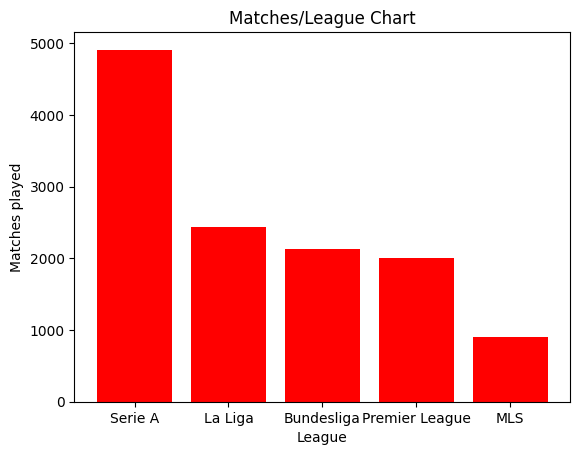

In [19]:
fig = plt.figure(figsize = (12, 6))
matches_league = df.groupby('League')['Matches_Played'].sum().sort_values(ascending=False)

label2 = list(matches_league.index.values)[:5]

f, ax = plt.subplots()
ax.bar(label2,matches_league[:5],color='red')
ax.set(xlabel='League',
     ylabel='Matches played')
plt.title('League/Matches Chart')
# plt.bar(label2, matches_league[:5], color ='maroon',
#         width = 0.2)

plt.xlabel("League", )
plt.ylabel("Matches played")
plt.title("Matches/League Chart")
plt.show()

Berdasarkan penjelasan Visualias diatas Serie A memperoleh match played paling banyak dan di susul la liga, Bundesliga, Premier League, MLs

##**Verify Data Quality**

####Missing Values

In [20]:
missing_values = df.isnull().sum()

print(missing_values)

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
dtype: int64


####Outliers Values

In [21]:
def detect_outliers(column):
    # Cek apakah kolom memiliki tipe data numerik
    if pd.api.types.is_numeric_dtype(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1

        outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

        percentage_outliers = outliers.sum() / len(column) * 100

        return outliers, percentage_outliers
    else:
        return None, None

for column in df.columns:
    outliers, percentage_outliers = detect_outliers(df[column])

    if outliers is not None and percentage_outliers is not None:
        print(f"Kolom '{column}':")
        print(f"  - Jumlah outliers: {outliers.sum()}")
        print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
        print()
    else:
        print(f"Kolom '{column}' tidak berisi data numerik.")

Kolom 'Country' tidak berisi data numerik.
Kolom 'League' tidak berisi data numerik.
Kolom 'Club' tidak berisi data numerik.
Kolom 'Player Names' tidak berisi data numerik.
Kolom 'Matches_Played':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Substitution ':
  - Jumlah outliers: 20
  - Persentase kehadiran outliers: 3.03%

Kolom 'Mins':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'Goals':
  - Jumlah outliers: 32
  - Persentase kehadiran outliers: 4.85%

Kolom 'xG':
  - Jumlah outliers: 19
  - Persentase kehadiran outliers: 2.88%

Kolom 'xG Per Avg Match':
  - Jumlah outliers: 22
  - Persentase kehadiran outliers: 3.33%

Kolom 'Shots':
  - Jumlah outliers: 11
  - Persentase kehadiran outliers: 1.67%

Kolom 'OnTarget':
  - Jumlah outliers: 20
  - Persentase kehadiran outliers: 3.03%

Kolom 'Shots Per Avg Match':
  - Jumlah outliers: 22
  - Persentase kehadiran outliers: 3.33%

Kolom 'On Target Per Avg Match':
  - Jumlah outliers: 24
  

####Duplicated Values

In [22]:
duplicate_values = df.duplicated()

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

Apakah Ada Nilai Duplikat pada Tiap Kolom:
0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool


####Inconsistent Values / Noise (Optional)

In [23]:
for column in df.columns:
    inconsistent_values = []
    for value in df[column]:
        if not pd.api.types.is_numeric_dtype(df[column].dtype):
            if not pd.api.types.is_string_dtype(df[column].dtype):
                inconsistent_values.append(value)
        else:
            if pd.isna(value):
                inconsistent_values.append(value)
    num_inconsistent = len(inconsistent_values)

    print(f"Kolom '{column}':")
    if num_inconsistent > 0:
        print(f"  - Terdapat {num_inconsistent} nilai inkonsisten/noise: {inconsistent_values}")
    else:
        print("  - Tidak ada nilai inkonsisten/noise.")

Kolom 'Country':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'League':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Club':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Player Names':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Matches_Played':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Substitution ':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Mins':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Goals':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'xG':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'xG Per Avg Match':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Shots':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'OnTarget':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Shots Per Avg Match':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'On Target Per Avg Match':
  - Tidak ada nilai inkonsisten/noise.
Kolom 'Year':
  - Tidak ada nilai inkonsisten/noise.
